In [11]:
import numpy as np
import matplotlib.pyplot as plt

from create_prepared_data_tsfresh import *
from compression import calculateCompRatio, compress_dataset
from utils.personal_utils import *

import os
import pywt

import matplotlib.pyplot as plt
import time

In [12]:
all_ds = {
    'AppliancesEnergy':   '/home/sim/Desktop/TS Extrinsic Regression/data/AppliancesEnergy_TRAIN.ts',
    'NewsTitleSentiment': '/home/sim/Desktop/TS Extrinsic Regression/data/NewsTitleSentiment_TRAIN.ts',
    'BenzeneConcentration':'/home/sim/Desktop/TS Extrinsic Regression/data/BenzeneConcentration_TRAIN.ts',
    'BeijingPM25Quality': '/home/sim/Desktop/TS Extrinsic Regression/data/BeijingPM25Quality_TRAIN.ts',

    'IEEEPPG':            '/home/sim/Desktop/TS Extrinsic Regression/data/IEEEPPG_TRAIN.ts',
    'FloodModeling1':     '/home/sim/Desktop/TS Extrinsic Regression/data/FloodModeling1_TRAIN.ts',
    'HouseholdPowerConsumption1': '/home/sim/Desktop/TS Extrinsic Regression/data/HouseholdPowerConsumption1_TRAIN.ts',
    'Covid3Month':              '/home/sim/Desktop/TS Extrinsic Regression/data/Covid3Month_TRAIN.ts'
}

In [13]:
# Save all y values
"""
for ds_name, ds_path in all_ds.items():
    ds_array, y = load_dataset(ds_path)
    filepath = os.path.join('/home/sim/Desktop/TS Extrinsic Regression/data/Dataset-Arrays', ds_name + "_y")
    np.save(filepath, y) """

'\nfor ds_name, ds_path in all_ds.items():\n    ds_array, y = load_dataset(ds_path)\n    filepath = os.path.join(\'/home/sim/Desktop/TS Extrinsic Regression/data/Dataset-Arrays\', ds_name + "_y")\n    np.save(filepath, y) '

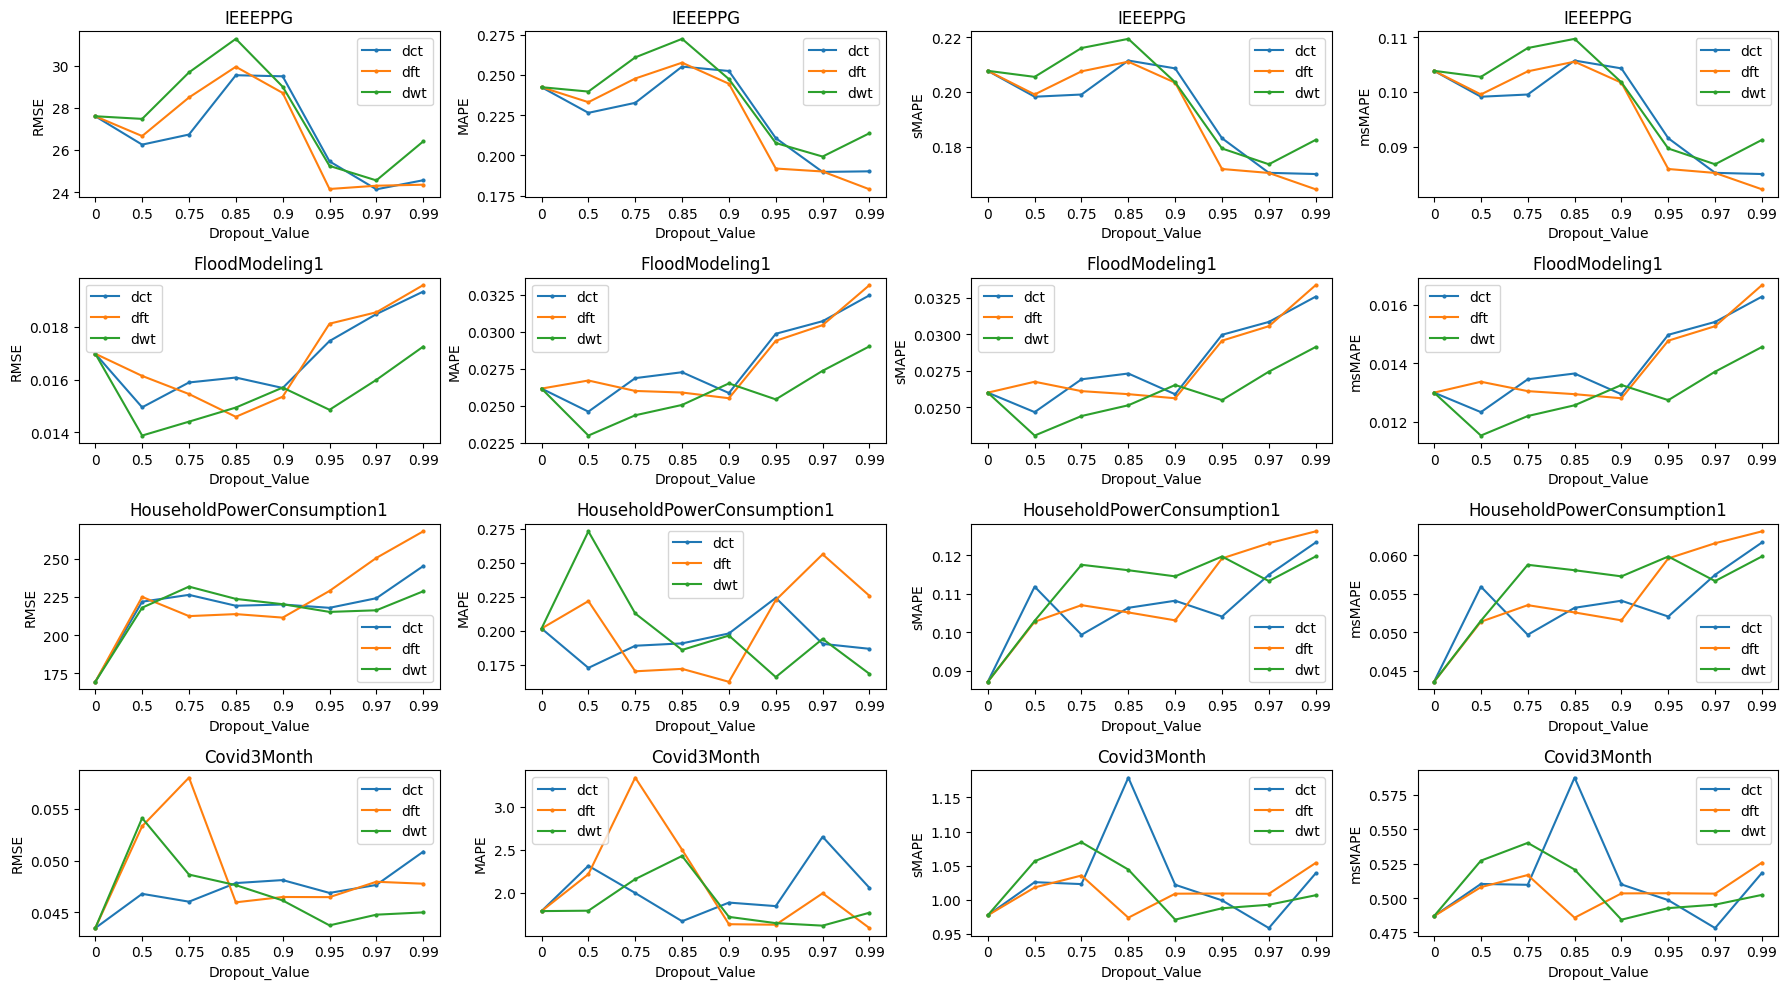

In [14]:
# Plot Dropout_Value against the metrics

path = '/home/sim/Desktop/TS Extrinsic Regression/PredictionsAllDatasets/'
dropout_values = [0, 0.5, 0.75, 0.85, 0.9, 0.95, 0.97, 0.99]
tqs = ['dct', 'dft', 'dwt']



""" ds_names = [
    'AppliancesEnergy',
    'AppliancesEnergy',
    'BenzeneConcentration',
    'BeijingPM25Quality',
] """

ds_names = [
    'IEEEPPG',
    'FloodModeling1',
    'HouseholdPowerConsumption1',
    'Covid3Month'
]



custom_x_ticks = np.arange(len(dropout_values))
plt.figure(figsize=(18, 10))  

num_dataset = len(ds_names)

for subplot_id, ds_name in enumerate(ds_names):

    dataset_array = np.load('/home/sim/Desktop/TS Extrinsic Regression/data/Dataset-Arrays/' + ds_name + '_TRAIN.npy')
    y = np.load(f'/home/sim/Desktop/TS Extrinsic Regression/data/Dataset-Arrays/{ds_name}_y.npy')


    for tq in tqs:
        comp_ratios = np.empty_like(dropout_values)
        rmse = np.empty_like(dropout_values)
        mape = np.empty_like(dropout_values)
        smape = np.empty_like(dropout_values)
        msmape = np.empty_like(dropout_values)


        for i, dropout in enumerate(dropout_values):
            if dropout == 0:
                prediction =  np.load(path + ds_name + '/' + f"NONE_{ds_name}_predictions.npy")

            else:
                prediction = np.load(path + ds_name + '/' + f"{dropout}_{tq}_{ds_name}_predictions.npy")
            rmse[i] = get_rmse(y, prediction)
            mape[i] = get_mape(y, prediction)
            smape[i] = get_smape(y, prediction)
            msmape[i] = get_msmape(y, prediction)

                #comp_ratios[i] = calculateCompRatio(dataset_array, compress_dataset(dataset_array.copy(), ds_name, andDecompress= False, compression_type= tq, compression_param=dropout))
                


        # comp_ratios = np.arange(len(dropout_values))


        num_metrics = 4


        plt.subplot(num_dataset,4,subplot_id * num_metrics + 1)
        plt.plot(custom_x_ticks, rmse, label=f"{tq}", marker= 'o', markersize = 2)
        plt.xlabel("Dropout_Value")
        plt.ylabel("RMSE")
        plt.legend()
        plt.title(f'{ds_name}')
        plt.xticks(custom_x_ticks, dropout_values)

        plt.subplot(num_dataset,4,subplot_id * num_metrics + 2)
        plt.plot(custom_x_ticks, mape, label=f"{tq}", marker= 'o', markersize = 2)
        plt.xlabel("Dropout_Value")
        plt.ylabel("MAPE")
        plt.legend()
        plt.title(f'{ds_name}')
        plt.xticks(custom_x_ticks, dropout_values)

        plt.subplot(num_dataset,4,subplot_id * num_metrics + 3)
        plt.plot(custom_x_ticks, smape, label=f"{tq}", marker= 'o', markersize = 2)
        plt.xlabel("Dropout_Value")
        plt.ylabel("sMAPE")  
        plt.legend()          
        plt.title(f'{ds_name}')               
        plt.xticks(custom_x_ticks, dropout_values)


        plt.subplot(num_dataset,4,subplot_id * num_metrics + 4)
        plt.plot(custom_x_ticks, msmape, label=f"{tq}", marker= 'o', markersize = 2)
        plt.xlabel("Dropout_Value")
        plt.ylabel("msMAPE")  
        plt.legend()          
        plt.title(f'{ds_name}')   
        plt.xticks(custom_x_ticks, dropout_values)

plt.tight_layout()

In [15]:
# Save each compression Ratio: !! Update when you change compression or loading code!  DO NOT DELETE

""" path = '/home/sim/Desktop/TS Extrinsic Regression/PredictionsAllDatasets/'
dropout_values = [0, 0.5, 0.75, 0.85, 0.9, 0.95, 0.97, 0.99]

tqs = ['dct', 'dft', 'dwt']

ds_names = [
    'AppliancesEnergy',
    'FloodModeling1',
    'BenzeneConcentration',
    'BeijingPM25Quality',
    'IEEEPPG',
    'HouseholdPowerConsumption1',
    'NewsTitleSentiment',
    'Covid3Month'
]

for ds_name in ds_names:

    dataset_array = np.load('/home/sim/Desktop/TS Extrinsic Regression/data/Dataset-Arrays/' + ds_name + '_TRAIN.npy')

    for tq in tqs:
        comp_ratios = np.empty_like(dropout_values)

        for i, dropout in enumerate(dropout_values):
            if dropout == 0:
                comp_ratios[i] = 1 # No Compression, so Comp-Ratio of 1
            else:
                comp_ratios[i] = calculateCompRatio(dataset_array, compress_dataset(dataset_array.copy(), ds_name, andDecompress= False, compression_type= tq, compression_param=dropout))

        np.save('/home/sim/Desktop/TS Extrinsic Regression/data/Comp_Ratios/' + f'{ds_name}_{tq}_TRAIN', comp_ratios) """


            

" path = '/home/sim/Desktop/TS Extrinsic Regression/PredictionsAllDatasets/'\ndropout_values = [0, 0.5, 0.75, 0.85, 0.9, 0.95, 0.97, 0.99]\n\ntqs = ['dct', 'dft', 'dwt']\n\nds_names = [\n    'AppliancesEnergy',\n    'FloodModeling1',\n    'BenzeneConcentration',\n    'BeijingPM25Quality',\n    'IEEEPPG',\n    'HouseholdPowerConsumption1',\n    'NewsTitleSentiment',\n    'Covid3Month'\n]\n\nfor ds_name in ds_names:\n\n    dataset_array = np.load('/home/sim/Desktop/TS Extrinsic Regression/data/Dataset-Arrays/' + ds_name + '_TRAIN.npy')\n\n    for tq in tqs:\n        comp_ratios = np.empty_like(dropout_values)\n\n        for i, dropout in enumerate(dropout_values):\n            if dropout == 0:\n                comp_ratios[i] = 1 # No Compression, so Comp-Ratio of 1\n            else:\n                comp_ratios[i] = calculateCompRatio(dataset_array, compress_dataset(dataset_array.copy(), ds_name, andDecompress= False, compression_type= tq, compression_param=dropout))\n\n        np.save(

WARNING:
- In Create pareto_values dict and in plotting it we use the pre-saved comp_ratio values for our pre_defined/usual dropout_values. 

-> IF I CHANGE THE COMPRESSION CODE OR PARTS OF CREATING_AND_PREPARE_DATA, I PROBABLY HAVE TO RELOAD THE RMSE VALUES

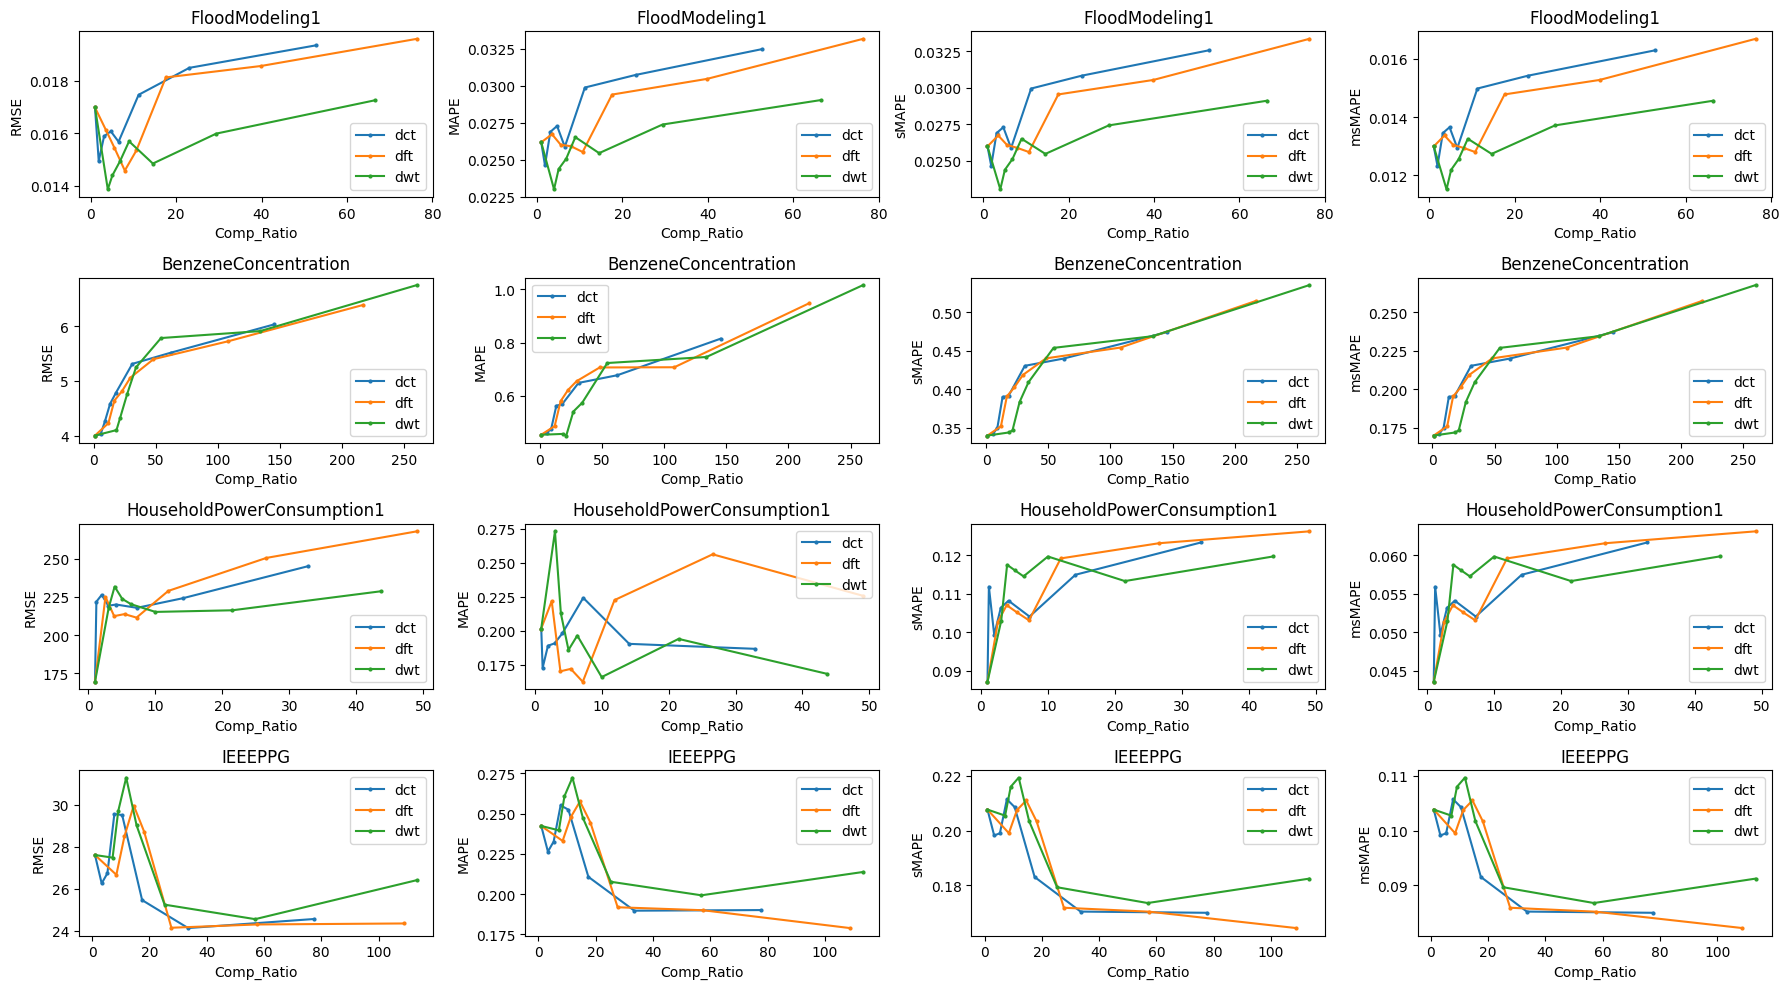

In [16]:
# Plot Comp_Ratio against the metric #> 6mins

path = '/home/sim/Desktop/TS Extrinsic Regression/PredictionsAllDatasets/'
dropout_values = [0, 0.5, 0.75, 0.85, 0.9, 0.95, 0.97, 0.99]

tqs = ['dct', 'dft', 'dwt']

ds_names = [
            'FloodModeling1', 
            'BenzeneConcentration',
            'HouseholdPowerConsumption1',
            'IEEEPPG',
            ]


plt.figure(figsize=(18, 10))  

num_dataset = len(ds_names)

for subplot_id, ds_name in enumerate(ds_names):

    dataset_array = np.load('/home/sim/Desktop/TS Extrinsic Regression/data/Dataset-Arrays/' + ds_name + '_TRAIN.npy')
    y = np.load(f'/home/sim/Desktop/TS Extrinsic Regression/data/Dataset-Arrays/{ds_name}_y.npy')


    for tq in tqs:
        comp_ratios = np.empty_like(dropout_values)
        rmse = np.empty_like(dropout_values)
        mape = np.empty_like(dropout_values)
        smape = np.empty_like(dropout_values)
        msmape = np.empty_like(dropout_values)


        for i, dropout in enumerate(dropout_values):
            if dropout == 0:
                prediction =  np.load(path + ds_name + '/' + f"NONE_{ds_name}_predictions.npy")
                #comp_ratios[i] = 1 # No Compression, so Comp-Ratio of 1 # Activate both to not use pre-saved comp_ratios

            else:
                prediction = np.load(path + ds_name + '/' + f"{dropout}_{tq}_{ds_name}_predictions.npy")
                
            rmse[i] = get_rmse(y, prediction)
            mape[i] = get_mape(y, prediction)
            smape[i] = get_smape(y, prediction)
            msmape[i] = get_msmape(y, prediction)


            # This is the time consuming step!
            #if dropout != 0:
            #    comp_ratios[i] = calculateCompRatio(dataset_array, compress_dataset(dataset_array.copy(), ds_name, andDecompress= False, compression_type= tq, compression_param=dropout))


        comp_ratios = np.load('/home/sim/Desktop/TS Extrinsic Regression/data/Comp_Ratios/' + f'{ds_name}_{tq}_TRAIN.npy')

            
        num_metrics = 4



        plt.subplot(num_dataset,4,subplot_id * num_metrics + 1)
        plt.plot(comp_ratios, rmse, label=f"{tq}", marker= 'o', markersize = 2)
        plt.xlabel("Comp_Ratio")
        plt.ylabel("RMSE")
        plt.legend()
        plt.title(f'{ds_name}')

        plt.subplot(num_dataset,4,subplot_id * num_metrics + 2)
        plt.plot(comp_ratios, mape, label=f"{tq}", marker= 'o', markersize = 2)
        plt.xlabel("Comp_Ratio")
        plt.ylabel("MAPE")
        plt.legend()
        plt.title(f'{ds_name}')

        plt.subplot(num_dataset,4,subplot_id * num_metrics + 3)
        plt.plot(comp_ratios, smape, label=f"{tq}", marker= 'o', markersize = 2)
        plt.xlabel("Comp_Ratio")
        plt.ylabel("sMAPE")  
        plt.legend()          
        plt.title(f'{ds_name}')               



        plt.subplot(num_dataset,4,subplot_id * num_metrics + 4)
        plt.plot(comp_ratios, msmape, label=f"{tq}", marker= 'o', markersize = 2)
        plt.xlabel("Comp_Ratio")
        plt.ylabel("msMAPE")  
        plt.legend()          
        plt.title(f'{ds_name}')   
        


plt.tight_layout()